# STOCHASTIC models of DENSITY-INDEPENDENT population growth

## Exercise 1
An endangered population of crested newts currently has a population size of just 100 and has birth rates and death rates of 0.5 yr-1 and 0.6 yr-1 respectively. Using the mathematical solution of the stochastic continuous-time density-independent birth-death model, what is the probability that they become extinct at a given time t in the future? 

The mathematical solution of stochastic **continuous-time** **density-independent** birth-death model is

$$
P_N(t) = \begin{cases}
    P_0(t) & \text{for N=0} \\
    (1-P_0)(1-u_t)u_t^{N-1} & \text{for N>0}
  \end{cases}
$$

where $P_N(t)$ is the probability that **an individual ($N_{t=0}=1$)** would reach the population size of $N$ at time $t$, and

$$
P_0(t) = \frac {d*(e^{(b-d)t}-1)} {b*e^{(b-d)t}-d} \\
u_t = \frac {b*(e^{(b-d)t}-1)} {b*e^{(b-d)t}-d}
$$

As can be seen, the probablity of going extinct at time $t$ of an individual is $P_0(t)$. Given that the population is "density-independent", meaning that the birth-death processes take place independently among individuals, the probability of a population with starting size $N0$ become extinct at a given time $t$ is $P_0(t)^{N0}$

In [1]:
set.seed(22)

## Exercise 2
Use the mathematical solution of the stochastic continuous-time density-independent birth-death model to sample the number of individuals at t = 100 starting with a population of size 1, where the birth and death rates are 0.5 yr-1 and 0.6 yr-1 respectively. Do the same for a population of size 10.

In [2]:
# for 1 individual
b <- 0.5
d <- 0.6
t <- 100
p01 <- d*(exp((b-d)*t)-1)/(b*exp((b-d)*t)-d) # the probablity that an individual goes extinct at time t
ut1 <- b*(exp((b-d)*t)-1)/(b*exp((b-d)*t)-d)

print(p01)
print(ut1)

[1] 0.9999924
[1] 0.833327


In [3]:
maxN=1000 # maximum population size PER INDIVIDUAL
pop_sizes <- seq(0, maxN)
probs <- c(p01, sapply(1:maxN, function(i) (1-p01)*(1-ut1)*ut1^(i-1)) )
sample(pop_sizes, 1, prob=probs) # a population starting with 1 individual

[1] 0

In [4]:
# a population starting with 10 individuals, birth-death is density-independent
# sampling WITH replacement, because the processes of the individuals are independent from each other
N_eachIndv <- sample(pop_sizes, 10, replace=TRUE, prob=probs) 
print(N_eachIndv)
sum(N_eachIndv)

 [1] 0 0 0 0 0 0 0 0 0 0


[1] 0

In [5]:
sampling_mathSol <- function(b=0.5, d=0.6, t=100, N0=1){
    
    p01 <- d*(exp((b-d)*t)-1)/(b*exp((b-d)*t)-d) # the probablity that an individual goes extinct at time t
    ut1 <- b*(exp((b-d)*t)-1)/(b*exp((b-d)*t)-d)
    
    maxN=1000 # maximum population size PER INDIVIDUAL
    pop_sizes <- seq(0, maxN)
    probs <- c(p01, sapply(1:maxN, function(i) (1-p01)*(1-ut1)*ut1^(i-1)) )
                           
    N_eachIndv <- sample(pop_sizes, N0, replace=TRUE, prob=probs) 
    
    return(sum(N_eachIndv))
}

In [6]:
data <- c()
for (i in 1:100){ # sampling the population 100 times
    data <- c(data, sampling_mathSol(t=100, N0=10))
}
unique(data)

[1] 0

Here, because the birth rate < death rate ($b<d$), at very large time $t$, the probability of going extinct of an individual is very close to 1. Therefore, when I did the sampling, even for small $N0=1$, the result was almost always zero (extinction event). Increasing $N0$ corresponds to do the sampling multiple times (e.g. here is 10 times) with replacement (as the processes of the individuals are independent from each other). When I did this, the result was also just extinction, indicating that $P_0(t=100)$ is very very large.

Now, let's try with shorter time $t$, I predicted that the result would no more be zero all the times

In [7]:
data <- c()
for (i in 1:100){ # sampling the population 100 times
    data <- c(data, sampling_mathSol(t=50, N0=10))
}
unique(data)

[1] 0 6 1 3 2

When I increased $N0 = 10 000$, then there were some chances that the population did NOT become extinct at $t=100$

In [8]:
data <- c()
for (i in 1:100){ # sampling the population 100 times
    data <- c(data, sampling_mathSol(t=100, N0=10000))
}
unique(data)

[1]  0  4  5  8  2  6  1 10

## Exercise 3
Simulate the dynamics of a population in discrete time where at each time only one immigration or emigration event can occur. Do this until t = 100 for an initial population of 1000 and plot the resulting population size. Use equal immigration and emigration probability of 0.1. This can be done efficiently using the Gillespie-Doob algorithm:

1. Determine the time to the next event. This time is geometrically distributed with probability (i + e). You can use the function rgeom in R.
2. Determine whether the event was an immigration event or emigration event. These have probabilities i/(i + e), e/(i + e). You can use the function sample in R.

In [1]:
library(ggplot2)
library(repr)

fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

In [2]:
i <- 0.1
e <- 0.1
p <- i+e
pi <- i/p
pe <- e/p
N0 <- 1000

t <- 0
event <- 0
N <- c(N0)
t_vec <- c(t)
tmax = 100

while (t <= tmax){
    
    if (event != 0){
        N <- c(N, N[length(N)] + event)
        t_vec <- append(t_vec, t)
    }
    
    t_event <- 1 + rgeom(1, p) # because results from rgeom go from 0, while we need time step, which is >=1
    t <- t + t_event
    event <- sample(c(1, -1), 1, replace=TRUE, prob=c(pi, ifelse(N[length(N)]>0, pe, 0.0))) # no emigration if pop size = 0
}

print(N)
print(t_vec)

 [1] 1000  999 1000  999 1000 1001 1000  999 1000  999 1000 1001 1002 1001 1000
[16]  999 1000  999  998  999  998  999 1000 1001
 [1]  0  8 10 12 15 17 20 27 29 30 35 41 45 47 53 60 66 67 69 81 83 86 90 91


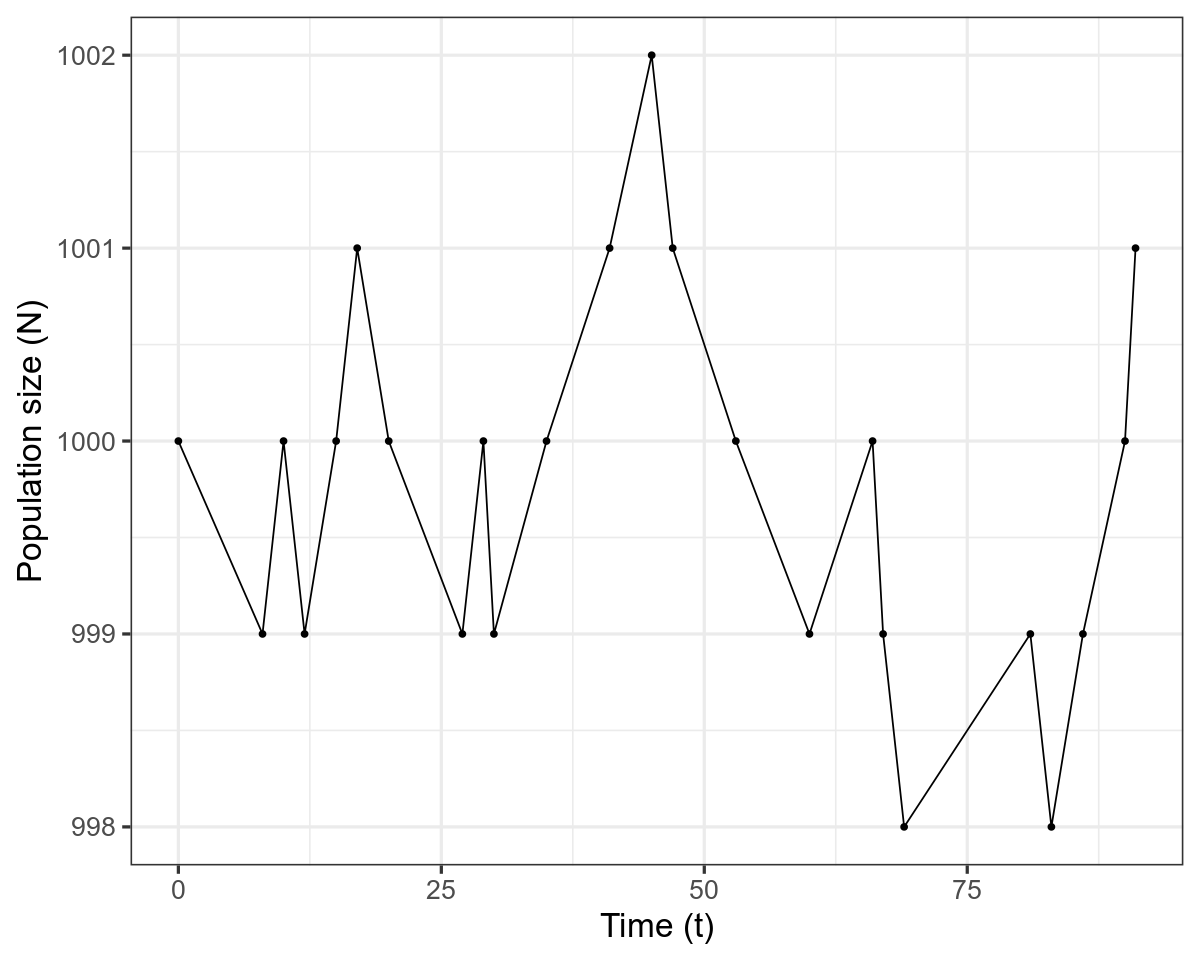

In [3]:
data <- data.frame(t_vec, N)

fig(10,8)
ggplot(data, aes(x=t_vec, y=N)) +
    geom_line()+
    geom_point()+
    labs(x = "Time (t)", y="Population size (N)")+
    theme_bw(base_size = 20)

## Exercise 4
Simulate the dynamics of a population in continuous time. Do this until t = 100 starting with a population of 1000 and plot the resulting population size. Use equal birth and death probability rate of 0.1. This can be done efficiently using the Gillespie-Doob algorithm:
- Determine the time to the next event. This time is exponentially distributed with probability rate (b + d)N. You can use the function rexp in R.
- Determine whether the event was a birth event or death event. These have probabilities b/(b + d), d/(b + d). You can use the function sample in R.

In [4]:
b <- 0.1
d <- 0.1
N0 <- 1000
pb <- b/(b+d)
pd <- d/(b+d)

t <- 0.0
event <- 0
N <- c(N0)
t_vec <- c(t)
tmax = 100

while (t <= tmax){
    
    if (event != 0){
        N <- c(N, N[length(N)] + event)
        t_vec <- append(t_vec, t)
    }
     
    r <- (b+d)*N[length(N)]
    
    if (r == 0) {
        t_event <- Inf # if the population becomes extincted, no more birth/death can occur
    } else {
        t_event <- rexp(1, r)
    }
    
    t <- t + t_event
    event <- sample(c(1, -1), 1, replace=TRUE, prob=c(pb, pd))
}

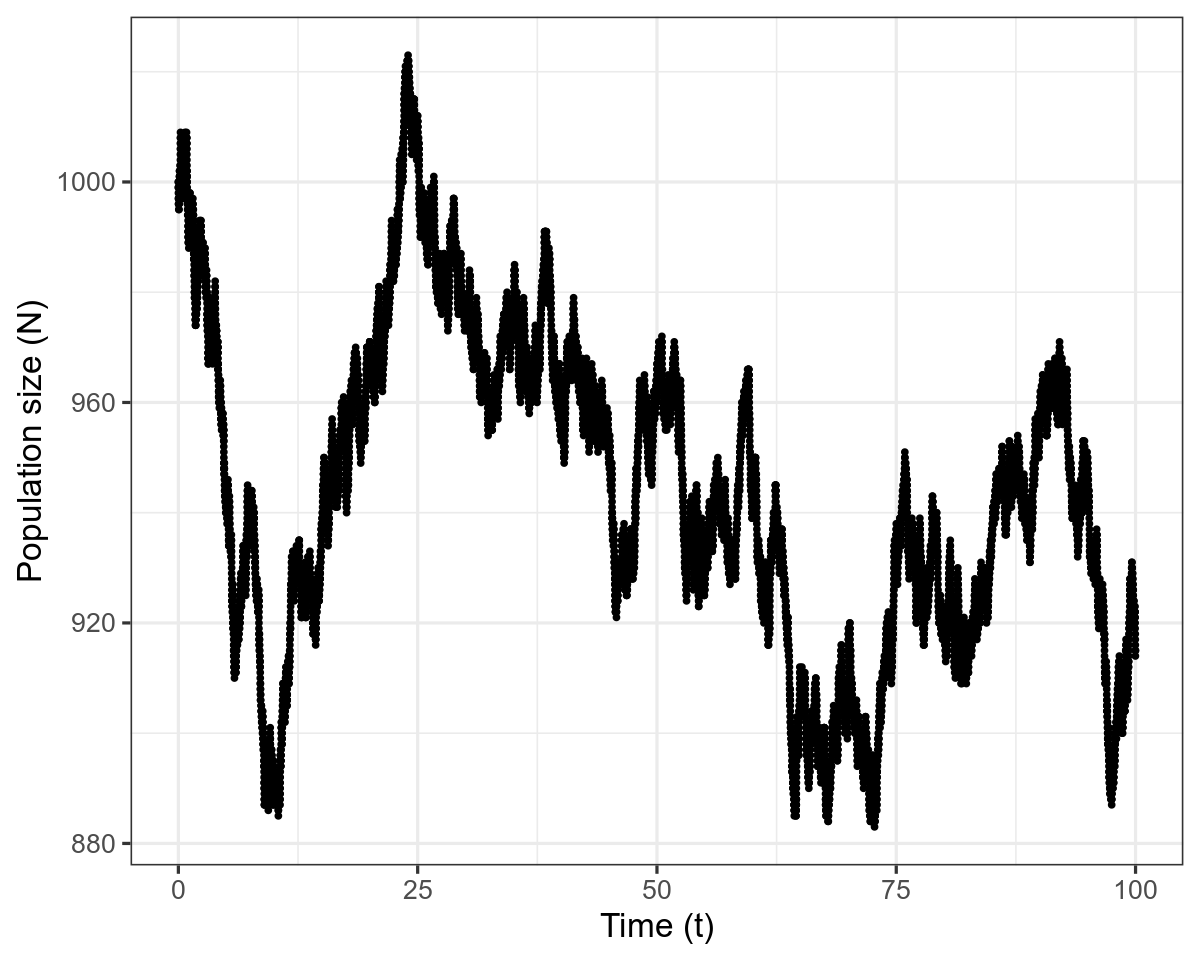

In [6]:
data <- data.frame(t_vec, N)

fig(10,8)
ggplot(data, aes(x=t_vec, y=N)) +
    geom_line()+
    geom_point()+
    labs(x = "Time (t)", y="Population size (N)")+
    theme_bw(base_size = 20)

## Exercise 5
Simulate in continuous time a stochastic birth-death model with density-dependent birth rate b(N) = max(0, b0(1 – N/K)) where b0 and K are parameters and N is the population size. Choose b0 = 3, d = 0.1 and K = 40. Plot the population size as a function of time.

In [7]:
b0 <- 3.0
K <- 40
d <- 0.1
N0 <- 1000

t <- 0.0
event <- 0
N <- c(N0)
t_vec <- c(t)
tmax = 100

while (t <= tmax){
    
    if (event != 0){
        N <- c(N, N[length(N)] + event)
        t_vec <- append(t_vec, t)
    }
    
    b <- max(0, b0*(1 - N[length(N)]/K))
    pb <- b/(b+d)
    pd <- d/(b+d)
    
    r <- (b+d)*N[length(N)]
    
    if (r == 0) {
        t_event <- Inf
    } else {
        t_event <- rexp(1, r)
    }
    
    t <- t + t_event
    event <- sample(c(1, -1), 1, replace=TRUE, prob=c(pb, pd))
}

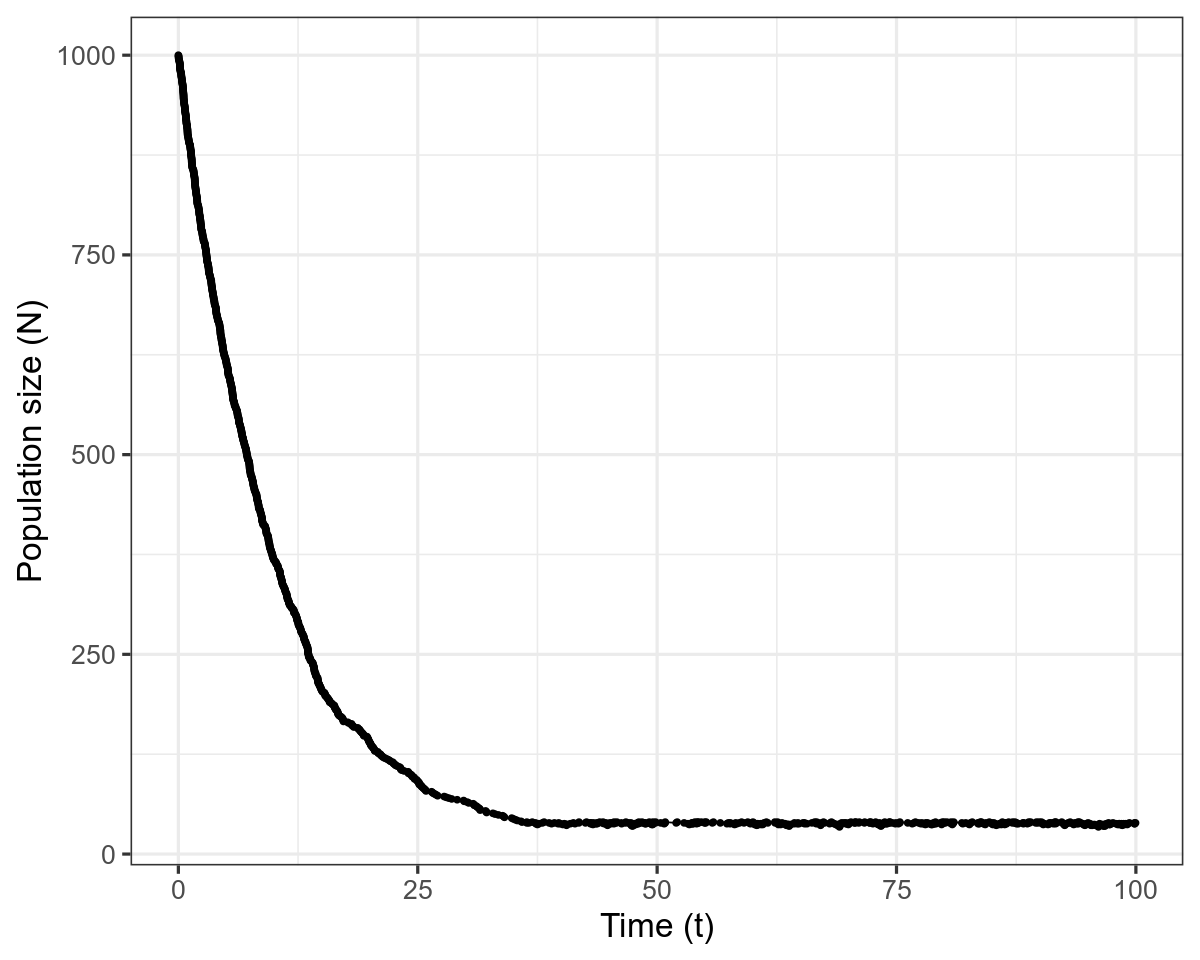

In [8]:
data <- data.frame(t_vec, N)

fig(10,8)
ggplot(data, aes(x=t_vec, y=N)) +
    geom_line()+
    geom_point()+
    labs(x = "Time (t)", y="Population size (N)")+
    theme_bw(base_size = 20)